# Performance Metrics 

In [7]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

from sklearn.datasets import load_breast_cancer
from sklearn.metrics import precision_recall_curve, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

## Data 

In [8]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data = breast_cancer.data, columns=breast_cancer.feature_names)
df = df.iloc[: , 10:15] # Only some columns
df["target"] = pd.Series(breast_cancer.target)
df.columns = df.columns.str.lower()
df

,radius error,texture error,perimeter error,area error,smoothness error,target
0,1.0950,0.9053,8.589,153.40,0.006399,0
1,0.5435,0.7339,3.398,74.08,0.005225,0
2,0.7456,0.7869,4.585,94.03,0.006150,0
3,0.4956,1.1560,3.445,27.23,0.009110,0
4,0.7572,0.7813,5.438,94.44,0.011490,0
...,...,...,...,...,...,...
564,1.1760,1.2560,7.673,158.70,0.010300,0
565,0.7655,2.4630,5.203,99.04,0.005769,0
566,0.4564,1.0750,3.425,48.55,0.005903,0
567,0.7260,1.5950,5.772,86.22,0.006522,0


In [9]:
X = df.drop(columns = ["target"])
y = df["target"]

X_pre = StandardScaler().fit_transform(X)
X_pre = pd.DataFrame(data = X_pre, columns = X.columns)
X_pre

,radius error,texture error,perimeter error,area error,smoothness error
0,2.489734,-0.565265,2.833031,2.487578,-0.214002
1,0.499255,-0.876244,0.263327,0.742402,-0.605351
2,1.228676,-0.780083,0.850928,1.181336,-0.297005
3,0.326373,-0.110409,0.286593,-0.288378,0.689702
4,1.270543,-0.790244,1.273189,1.190357,1.483067
...,...,...,...,...,...
564,2.782080,0.071025,2.379583,2.604187,1.086384
565,1.300499,2.260938,1.156857,1.291565,-0.424010
566,0.184892,-0.257371,0.276693,0.180698,-0.379342
567,1.157935,0.686088,1.438530,1.009503,-0.173000


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_pre, y, test_size=0.2, stratify=y, random_state=666)
X_train.shape, X_test.shape

((455, 5), (114, 5))

In [11]:
lr = LogisticRegression(random_state=666)

lr.fit(X_train, y_train)

y_train_pred = lr.predict_proba(X_train)[: , 1]
y_test_pred = lr.predict_proba(X_test)[: , 1]

print(f'{roc_auc_score(y_train, y_train_pred) = }')
print(f'{roc_auc_score(y_test, y_test_pred) = }')


roc_auc_score(y_train, y_train_pred) = 0.936780185758514
roc_auc_score(y_test, y_test_pred) = 0.9474206349206349


## Precision - Recall - F1

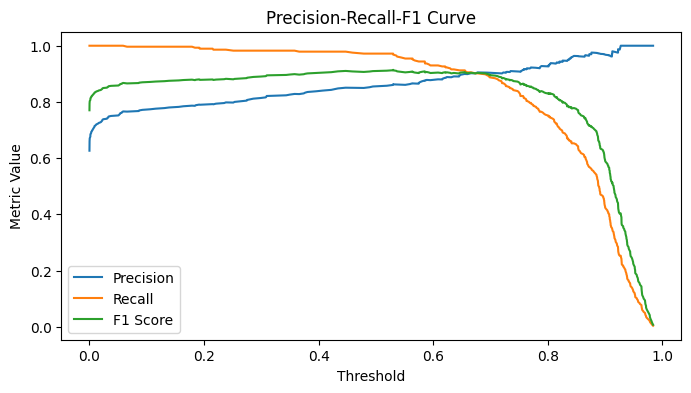

In [12]:
precision, recall, thresholds = precision_recall_curve(y_train, y_train_pred)
f1_score = 2 * (precision * recall)/(precision + recall)

plt.figure(figsize=(8,4))
plt.plot(thresholds, precision[:-1], label = "Precision")
plt.plot(thresholds, recall[:-1], label = "Recall")
plt.plot(thresholds, f1_score[:-1], label = "F1 Score")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Metric Value")
plt.title("Precision-Recall-F1 Curve")
plt.savefig("img/precision_recall_f1_curve.png", dpi = 300, bbox_inches='tight')
plt.show()